# Exploratory Data Analysis of Music Artists Data

(Add description here)

[Factors of Academic Success Survey](https://forms.gle/vJcqWct3swRasCbAA "Link to Google Forms")


#### The two demographics that were surveyed:
- A Drum Corps Facebook Page
- People and friends who follow me on my social media accounts

#### Question to be answered:
- What music artists are listened to by smart students?

## Importing libraries and survey results

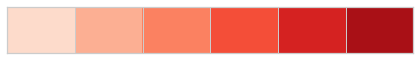

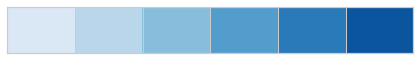

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# My Modules
from display_columns import split_dataframe as splitdf
from cleaning import make_dummies, combine_duplicate_columns, get_avg_i_scores

# Pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib
rcParams.update({'figure.autolayout': True})
figsize=(10,10)
plt.style.use('ggplot')
#print(plt.style.available)
#%matplotlib notebook
%matplotlib inline

# Seaborn
sns.set(style="whitegrid") # <-- also affects matplotlib plots, cancels plt.style.use()
sns.palplot(sns.color_palette("Reds"))
sns.palplot(sns.color_palette("Blues"))

#### Read survey spreadsheets

In [2]:
surveydata = pd.read_csv("surveydata.csv")
surveydata.set_index("timestamp", inplace=True)

i_scores = pd.read_csv("i_score_values.csv")
i_scores.set_index("timestamp", inplace=True)

surveydata = i_scores.join(surveydata, how="left")

<hr>

# Favorite Music Artists

To analyze the `fav_music_artists` column, we can split up each artist into its own column and insert either a `1` or `0` depending on if each participant listed each artist as one of their favorites. 

We will want to view the data before using it, because it is likely that some additional cleaning will need to be done to make the artist names consistent with each other.

In [3]:
fav_music_artists = make_dummies(surveydata.fav_music_artists.fillna("").apply(lambda x: x.split(",")),astype=int)

agg_fav_music_artists = fav_music_artists.sum().sort_values(ascending=False)

splitdf(agg_fav_music_artists, drop_index=False)

,0,1,2,3,4,5,6,7,8,9
0,,8,corey_taylor,1,no_bs_brass_band,1,nothing_but_thieves,1,motley_crue,1
1,queen,4,daniel_caesar,1,jonsi,1,billie_eilish,1,eminem,1
2,jacob_collier,3,watsky,1,thank_you_scientist,1,sammy_rae,1,nf,1
3,taylor_swift,3,lil_skies,1,jordan_rakei,1,foster_the_people,1,bastille,1
4,the_beatles,3,halestorm,1,sabaton,1,lana_del_rey,1,vampire_weekend,1
5,post_malone,2,k._flay,1,battle_tapes,1,pit_bull,1,kodaline,1
6,kendrick_lamar,2,and_kanye_west,1,carpenter_brut,1,the_weeknd,1,lewis_capaldi,1
7,paramore,2,anderson_.paak,1,e-dubble,1,future,1,amber_run,1
8,the_red_hot_chili_peppers,2,travis_scott,1,i_have_none,1,panic_at_the_disco,1,old_dominion,1
9,stone_temple_pilots,2,thom_yorke,1,guns_&_roses,1,pierce_the_veil,1,lady_gaga,1


In [4]:
fav_music_artists.iloc[:,0:5].head()

,electric_light_orchestra,benny_goodman,glenn_miller,stevie_wonder,youngblood_brass_band
timestamp,,,,,
2020-02-19 11:20:32.365,1,0,0,0,0
2020-02-19 11:22:18.391,0,1,1,1,0
2020-02-19 11:22:22.283,0,0,0,0,1
2020-02-19 11:24:48.272,0,0,0,0,0
2020-02-19 11:36:03.104,0,0,0,0,0


Most of the survey takers followed the instructions to input the full names of their favorite artists, so there is only minimal cleaning to be done. Although this is interesting information, it will be difficult to put it to meaningful use because it is spread out so sparsely among the artists. 

We can, however, use this information to order the musical artists in the dataset by average `i_score`. To do this, we can write a function that accumulates the total `i_score` for each artist, then divide that by the number of people who had the artist listed as one of their favorites. Although this will lead to an exessive amount of bars in our chart, we will end up with an interesting graph that many people will be able to make use of.

In [28]:
splitdf(pd.Series(fav_music_artists.columns))

,0
0,electric_light_orchestra
1,benny_goodman
2,glenn_miller
3,stevie_wonder
4,youngblood_brass_band
5,we_are_the_union
6,streetlight_manifesto
7,badfish
8,the_beatles
9,boston


In [6]:
splitdf(pd.Series(fav_music_artists.columns)).iloc[[12,13],4].values

array(['bad_suns',
       'i_don’t_have_a_preference_i_don’t_like_anything_specific'],
      dtype=object)

In [7]:
fav_music_artists.rename(columns={'and_kanye_west':'kanye_west', 
                                  'panic_at_the_disco':'panic_at_the_disco', # fix to :'panic!_at_the_disco' with df.any()
                                  'i_don’t_have_a_preference_i_don’t_like_anything_specific':'',
                                  'none_of_my_playlists_have_a_theme_i_listen_to_everything_except_screamo':'',
                                  'i_have_none':'',
                                  'clipping.':'clipping',
                                  'ac/dc...':'ac/dc',
                                  'zappa':'zappa', # fix to :'frank_zappa' with df.any()
                                  'alternative':''},
                         inplace=True)

In [8]:
def search_columns(df, query):
    for i in df.columns.tolist():
        if query in i:
            print(i)    
    
search_columns(fav_music_artists, 'frank')
search_columns(fav_music_artists, 'zappa')
print()
search_columns(fav_music_artists, 'panic')

frank_sinatra
frank_ocean
zappa

panic_at_the_disco
panic!_at_the_disco


In [9]:
#No preexisting 'frank_zappa', so no need to combine
#fav_music_artists['frank_zappa'] = fav_music_artists[['frank_zappa', 'zappa']].any(axis=1)
fav_music_artists.rename(columns={'zappa':'frank_zappa'}, inplace=True)

fav_music_artists['panic!_at_the_disco'] = fav_music_artists[['panic!_at_the_disco', 'panic_at_the_disco']].any(axis=1)

In [10]:
fav_music_artists.drop('panic_at_the_disco', axis=1, inplace=True)
fav_music_artists.drop("", axis=1, inplace=True)

In [11]:
#def get_avg_i_scores(dataframe, dummy):
#    dummy = dummy.astype(bool)
#    avg_scores = {}
#    for col in dummy.columns:
#        avg_scores[col] = surveydata.loc[dummy[col],'i_score'].sum() / dummy[col].sum()
#    return pd.Series(avg_scores)

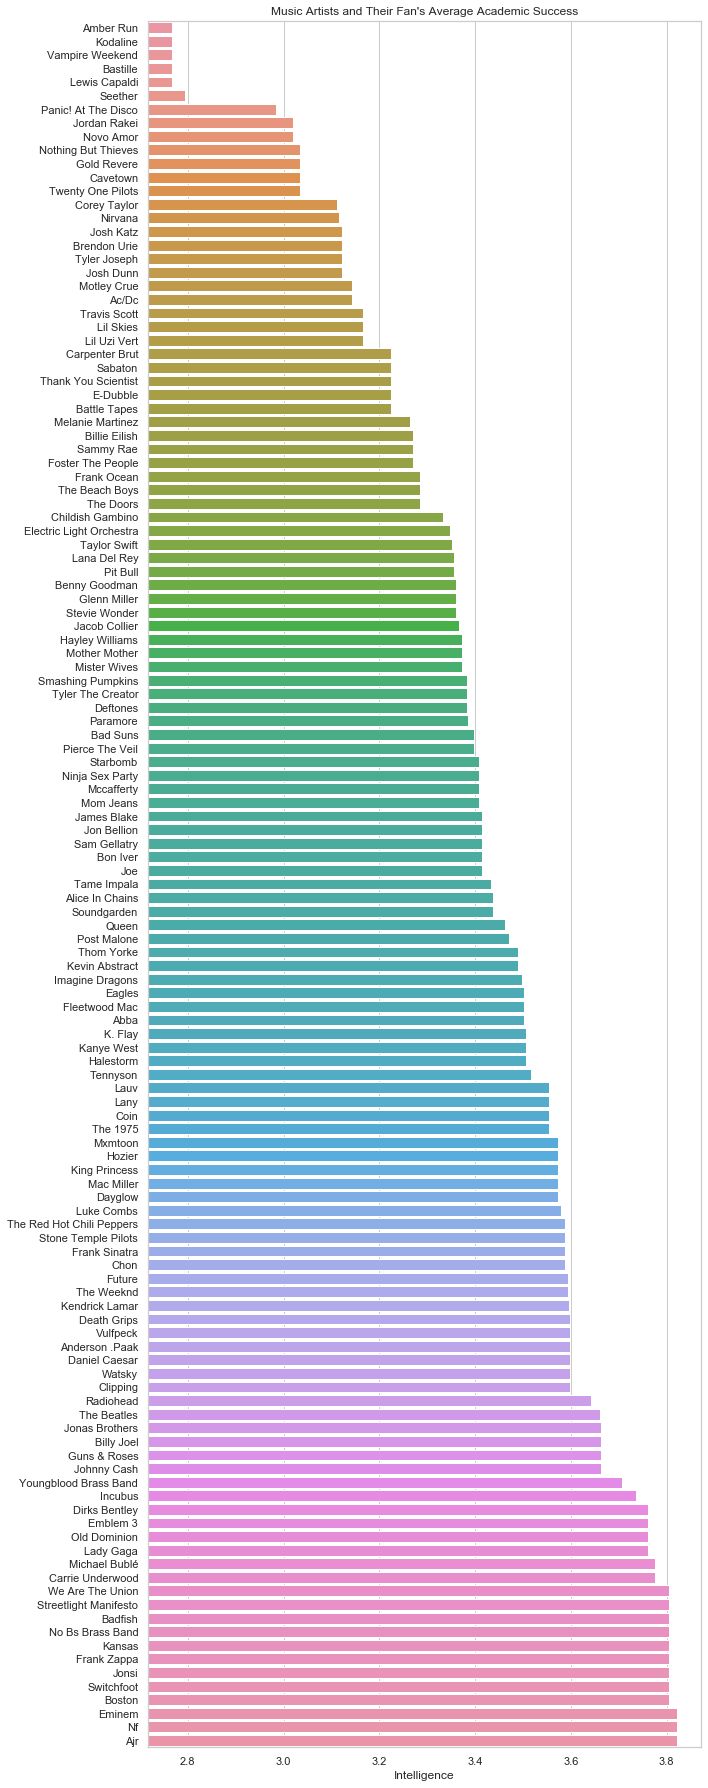

In [12]:
data = get_avg_i_scores(surveydata,fav_music_artists)
data = pd.DataFrame(data.sort_values(ascending=True)).reset_index(level=0)
data.columns = ["artist_name", "avg_i_score"]

fig, ax = plt.subplots(figsize=(figsize[0],25))
sns.barplot(ax=ax,data=data, x='avg_i_score', y='artist_name')

ax.set(title="Music Artists and Their Fan's Average Academic Success", xlim=(data['avg_i_score'].min()-.05,data['avg_i_score'].max()+.05), ylabel='', xlabel="Intelligence")
plt.yticks(np.arange(data.shape[0]), data['artist_name'].str.replace('_',' ').str.title())
plt.savefig("Graphs/MusicArtistsBefore.png")
plt.show()

### Condensing the Music Artists dataset
As you may notice, this graph has many data points with the same average intelligence score. This is because for the vast majority of artists, only a single person listed them as one of their favorites. 

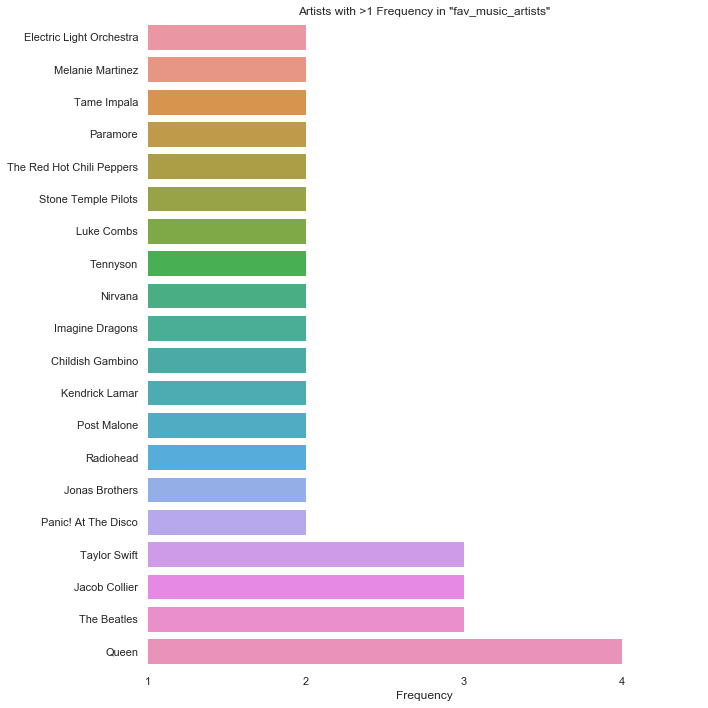

In [13]:
data = pd.DataFrame(fav_music_artists.sum()[fav_music_artists.sum() > 1].sort_values(ascending=True)).reset_index(level=0)
data.columns = ["artist_name", "frequency"]

fig, ax = plt.subplots(figsize=figsize)
sns.barplot(ax=ax, data=data, x='frequency', y='artist_name')
sns.despine(left=True, bottom=True)

ax.set(title='Artists with >1 Frequency in "fav_music_artists"', xlim=(1,data['frequency'].max() + .5), ylabel='', xlabel="Frequency")

plt.grid(False)
plt.xticks(np.arange(1,5,1))
plt.yticks(np.arange(data.shape[0]), data['artist_name'].str.replace('_',' ').str.title())
plt.savefig("Graphs/Frequency_fav_music_artists.png")
plt.show()

Although our visualization may be fine for some low quality Medium article, we should condense the music artists dataset to make it both easier to read and more meaningful.

Since the `fav_music_artists` question in the survey resulted in a large variety of artist names, I created a different question for the later releases of the survey, labeled `chosen_music_artists`. Although half of the dataset does not have a response to this question, we can add any overlap with `fav_music_artists` to create a more meaningful visualization. We can also include the values from `fav_music_artists` with a frequency greater than one to make our data more descriptive of the entire dataset.

In [14]:
chosen_music_artists = make_dummies(surveydata.chosen_music_artists.fillna("").apply(lambda x: x.split(",")),astype=int)
chosen_music_artists.drop("", axis=1, inplace=True)
chosen_music_artists.columns

Index(['radiohead', 'beethoven', 'pink_floyd', 'chicago', 'billy_joel',
       'post_malone', 'maroon_5', 'rex_orange_county', 'the_beatles',
       'frank_zappa', 'beyoncé', 'lil_wayne', 'justin_timberlake'],
      dtype='object')

In [15]:
music_artists = chosen_music_artists.join(fav_music_artists, how="left", rsuffix="2")

music_artists = combine_duplicate_columns(music_artists, chosen_music_artists.columns, "2")

music_artists = music_artists[np.unique(
    chosen_music_artists.columns.to_list() 
    + fav_music_artists.sum()[fav_music_artists.sum() > 1].index.to_list()
                                       )]

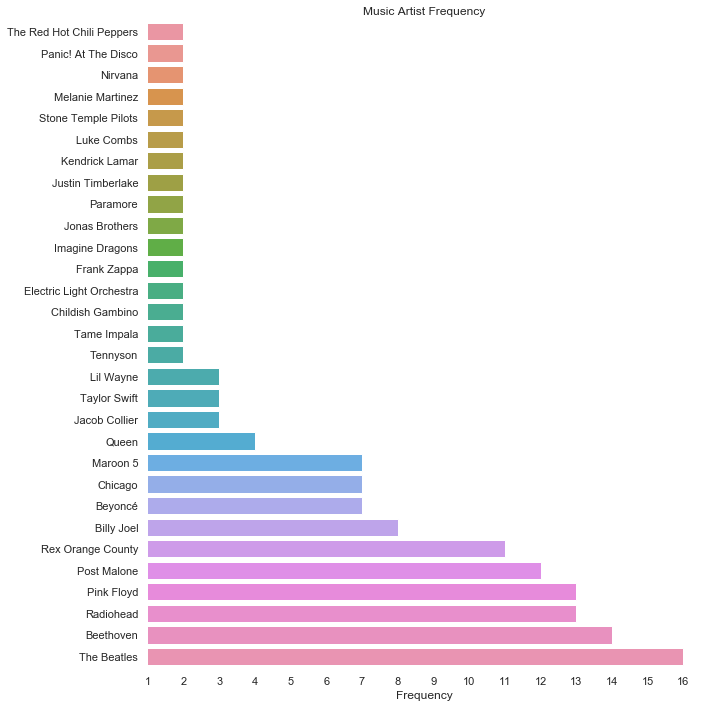

In [16]:
data = pd.DataFrame(music_artists.sum().sort_values(ascending=True)).reset_index(level=0)
data.columns = ["artist_name", "frequency"]

fig, ax = plt.subplots(figsize=figsize)
sns.barplot(ax=ax, data=data, x='frequency', y='artist_name')
sns.despine(left=True, bottom=True)

ax.set(title='Music Artist Frequency', xlim=(1,data['frequency'].max() + .5), ylabel='', xlabel="Frequency")

plt.grid(False)
plt.xticks(np.arange(1,data['frequency'].max()+1,1))
plt.yticks(np.arange(data.shape[0]), data['artist_name'].str.replace('_',' ').str.title())
plt.savefig("Graphs/Frequency_music_artists.png")
plt.show()

Although there are many artists in our selection with a frequency of only two, we can still use them in our graph since this is a low-stakes project. If these results were being put to meaningful use, we would drop the artists with a low frequency, depending on the total number of people who took the survey.

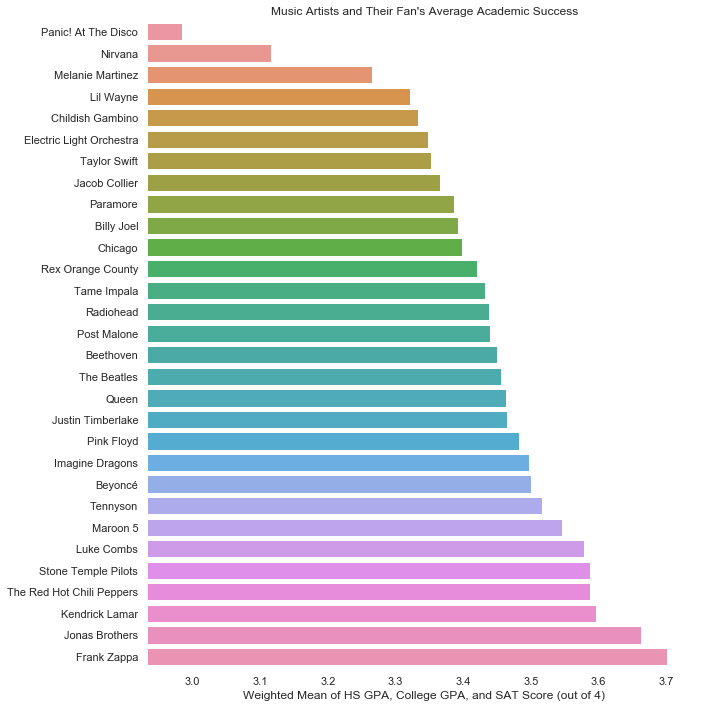

In [17]:
data = get_avg_i_scores(surveydata, music_artists)
data = pd.DataFrame(data.sort_values(ascending=True)).reset_index(level=0)
data.columns = ["artist_name", "avg_i_score"]

fig, ax = plt.subplots(figsize=figsize)
sns.barplot(ax=ax,data=data, x='avg_i_score', y='artist_name')
sns.despine(left=True, bottom=True)

ax.set(title="Music Artists and Their Fan's Average Academic Success", xlim=(data['avg_i_score'].min()-.05,data['avg_i_score'].max()+.05), ylabel='', xlabel="Weighted Mean of HS GPA, College GPA, and SAT Score (out of 4)")

plt.grid(False)
plt.yticks(np.arange(data.shape[0]), data['artist_name'].str.replace('_',' ').str.title())
plt.savefig("Graphs/FOAS_MusicArtists.png")
plt.show()

### Plot Aesthetics
To tidy up the chart, we can change the x limit in a way that minimizes the length of the bars. As a general rule, the less ink we can use to convey our plot's message, the better. We'll also change the rainbow aesthetic into something neater.

In [18]:
data = get_avg_i_scores(surveydata, music_artists).sort_values(ascending=True)

In [19]:
data

panic!_at_the_disco          2.983875
nirvana                      3.115774
melanie_martinez             3.265039
lil_wayne                    3.321454
childish_gambino             3.333541
electric_light_orchestra     3.348507
taylor_swift                 3.352735
jacob_collier                3.365600
paramore                     3.385892
billy_joel                   3.392030
chicago                      3.397813
rex_orange_county            3.421008
tame_impala                  3.432887
radiohead                    3.437731
post_malone                  3.440143
beethoven                    3.450116
the_beatles                  3.456223
queen                        3.463318
justin_timberlake            3.464303
pink_floyd                   3.482941
imagine_dragons              3.498086
beyoncé                      3.500346
tennyson                     3.516189
maroon_5                     3.546034
luke_combs                   3.578801
stone_temple_pilots          3.587061
the_red_hot_

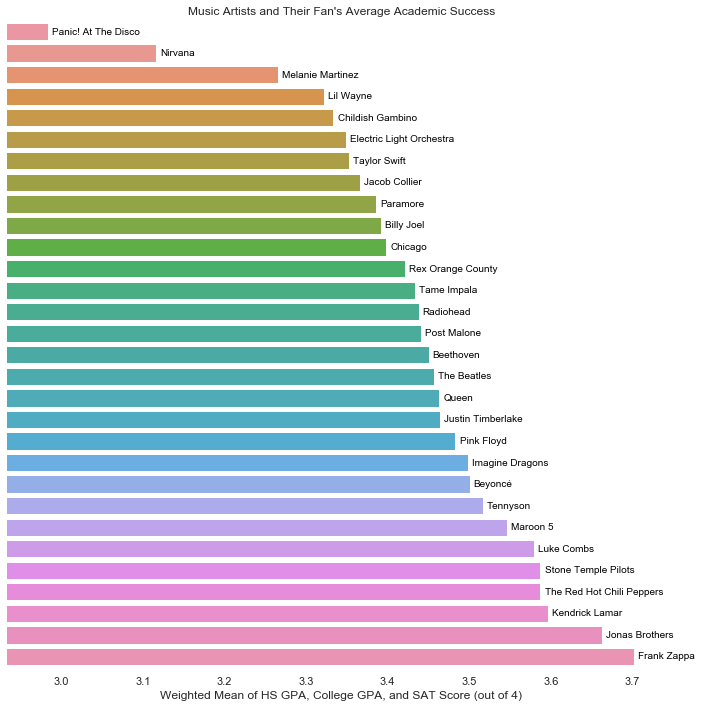

In [20]:
data = get_avg_i_scores(surveydata, music_artists)
data = pd.DataFrame(data.sort_values(ascending=True)).reset_index(level=0)
data.columns = ["artist_name", "avg_i_score"]

fig, ax = plt.subplots(figsize=figsize)
sns.barplot(ax=ax,data=data, x='avg_i_score', y='artist_name')
sns.despine(left=True, bottom=True)

ax.set(title="Music Artists and Their Fan's Average Academic Success", xlim=(data['avg_i_score'].min()-.05,data['avg_i_score'].max()+.05), ylabel='', xlabel="Weighted Mean of HS GPA, College GPA, and SAT Score (out of 4)")

for i, value in enumerate(data.values):
    ax.text(value[1]+.005, i, data.artist_name[i].replace('_',' ').title(), va='center', color='black', fontsize=10)

plt.grid(False)
plt.yticks(np.arange(data.shape[0]), '') #data['artist_name'].str.replace('_',' ').str.title()
plt.show()

### Minimizing Bar Size
An efficient method to minimize the amount of useless information on the plot is to pivot the bars around the average value for the dataset. This will put values below the mean on the left, and values above the mean on the right.

In [21]:
data['avg_i_score'].mean()

3.436177701086565

In [22]:
data = get_avg_i_scores(surveydata, music_artists)
data = pd.DataFrame(data.sort_values(ascending=True)).reset_index(level=0)
data.columns = ["artist_name", "avg_i_score"]

data['avg_i_equalized'] = data['avg_i_score'] - data['avg_i_score'].mean()

In [23]:
data.sample(n=5,random_state=1)

,artist_name,avg_i_score,avg_i_equalized
17,queen,3.463318,0.027140
21,beyoncé,3.500346,0.064168
10,chicago,3.397813,-0.038364
19,pink_floyd,3.482941,0.046763
14,post_malone,3.440143,0.003965


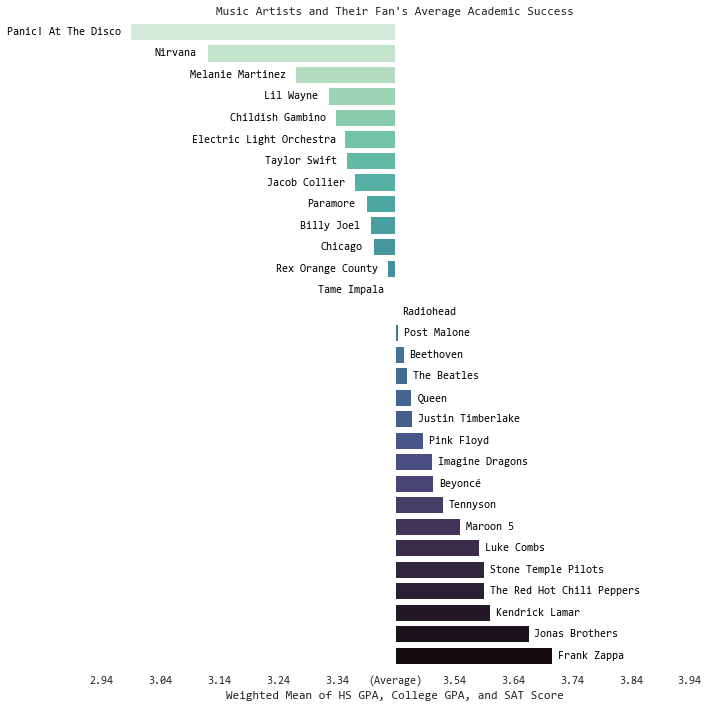

In [24]:
rcParams['font.family'] = "monospace"
rcParams['font.monospace'] = ['Consolas']
palette = 'mako_r'

fig, ax = plt.subplots(figsize=figsize)
sns.barplot(ax=ax,data=data, x='avg_i_equalized', y='artist_name', palette=palette)
sns.despine(left=True, bottom=True)

ax.set(title="Music Artists and Their Fan's Average Academic Success", xlim=(data['avg_i_equalized'].min()-.05,data['avg_i_equalized'].max()+.05), ylabel='', xlabel="Weighted Mean of HS GPA, College GPA, and SAT Score")

for i, value in enumerate(data.values):
    if value[2] < 0: # data['avg_i_score'].mean()
        x = value[2] - len(data.artist_name[i].replace(' ',''))*.0099 - .02   # good enough lol, could also use *.009, *.01
    else:
        x = value[2] + .01
        
    ax.text(x, i, data.artist_name[i].replace('_',' ').title(), va='center', color='black', fontsize=11)

xticks = [round(i+data['avg_i_score'].mean(),2) for i in np.arange(-.5,.6,.1)]
xticks[5] = '(Average)'
    
plt.grid(False)
plt.xticks(np.arange(-.5,.6,.1), xticks)
plt.yticks(np.arange(data.shape[0]),'') # y ticks are already shaped to bar size
plt.savefig("Graphs/FOAS_MusicArtists.png")
plt.show()

### Reversed Version:
`ascending=False`

`palette = 'mako'`

`figsize = (10,6), (10,10)`

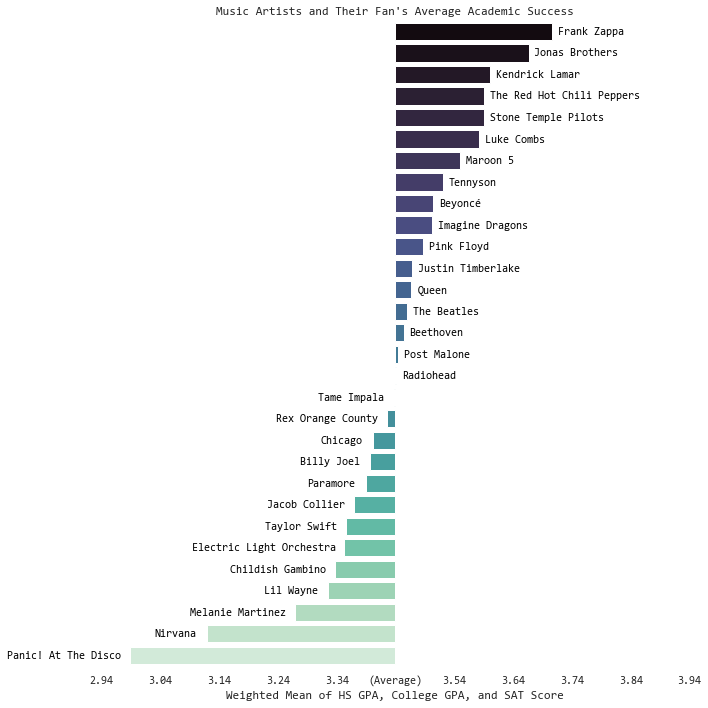

In [25]:
data = get_avg_i_scores(surveydata, music_artists)
data = pd.DataFrame(data.sort_values(ascending=False)).reset_index(level=0)# <-- ascending=False
data.columns = ["artist_name", "avg_i_score"]

data['avg_i_equalized'] = data['avg_i_score'] - data['avg_i_score'].mean()

rcParams['font.family'] = "monospace"
rcParams['font.monospace'] = ['Consolas']
palette = 'mako'#                                                            <-- palette = 'mako'

fig, ax = plt.subplots(figsize=figsize)
sns.barplot(ax=ax,data=data, x='avg_i_equalized', y='artist_name', palette=palette)
sns.despine(left=True, bottom=True)

ax.set(title="Music Artists and Their Fan's Average Academic Success", xlim=(data['avg_i_equalized'].min()-.05,data['avg_i_equalized'].max()+.05), ylabel='', xlabel="Weighted Mean of HS GPA, College GPA, and SAT Score")

for i, value in enumerate(data.values):
    if value[2] < 0: # data['avg_i_score'].mean()
        x = value[2] - len(data.artist_name[i].replace(' ',''))*.0099 - .02   # good enough lol, could also use *.009, *.01
    else:
        x = value[2] + .01
        
    ax.text(x, i, data.artist_name[i].replace('_',' ').title(), va='center', color='black', fontsize=11)

xticks = [round(i+data['avg_i_score'].mean(),2) for i in np.arange(-.5,.6,.1)]
xticks[5] = '(Average)'
    
plt.grid(False)
plt.xticks(np.arange(-.5,.6,.1), xticks)
plt.yticks(np.arange(data.shape[0]),'') # y ticks are already shaped to bar size
plt.savefig("Graphs/FOAS_MusicArtists_Alt.png")
plt.show()

# Summary
It is surprising that seemingly "big brain" bands like Radiohead and Beethoven lay close to the average for the dataset, as opposed to being higher in the list. This is likely due to the low frequency of each artist in general leading to randomness in the mean values, however I would have expected bands like The Beatles and Billy Joel to be higher due to their "before-our-time"-ness. Frank Zappa leading the intelligence pack makes sense, as he is an absolute god among men that we are not worthy of.